In [ ]:
# ASSIGNMENT 1                                                McGill COMP451 - Fall 2022
**Mingze Wang 260986639**

*If you discussed your solution with any other student please list their name above. You are expected to write your own solutions.*

For programming parts ensure that you have installed 

- Numpy
- Scipy
- Scikit-Learn
- Matplotlib

You can also upload the file to Google Colab where these packages are available. 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from IPython.core.debugger import set_trace #this is used for debugging
np.random.seed(1234) 

## Problem 1. (4pts)
After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious desease, and that the test is 99% accurate (more pricesely, the probability of testing positive given that you have the disease is .99, as is the probability of testing negative given that you don't have the disease.) The good news is that this is a rare disease, striking only one in 10,000 people. What are the chances that you actually have the disease? (include calculations as well as the final result)  

## 1) Solution 
Assume $P(A)$ is the probability of having the desease<br>
Assume $P(B)$ is the probability of being tested positive<br>
Then $P(A')$ is the probability of not having the desease<br>
Then $P(B')$ is the probability of being tested negative<br>
We want to know $P(A|B)$, it is equal to $P(B|A)* P(A)/ P(B)$<br>
We already know $P(B|A)=0.99, P(B'|A')=0.99, P(A)=0.0001, P(A')=0.9999,P(B|A')=0.01$<br>
We need to find $P(B), P(B)=P(B|A)P(A)+P(B|A')P(A')=0.99*0.0001+0.01*0.9999=0.010098$<br>
Then $P(A|B)=0.99*0.0001/0.010098=0.0098039215686=0.0098$<br>
Therefore, the chances that I actually have the disease is $0.0098$

## Problem 2. Sigmoid and Softmax (4pts)
In this assignment we want to better understand the softmax function and its relation to *logistic sigmoid*. 
### 2.a (2pts)
Prove that $\mathcal{S}(a + c) = \mathcal{S}(a)$, where $a$ is a vector and $c$ is a scalar. This property enables us to avoid over/underflow in calculating the softmax due to exponentiation of large positive or negative number. We achieve this by subtracting the largest value in the input vector; see the implementation below. 

In [10]:
def softmax(a):
    a = a - np.max(a) #this is to avoid over/underflow
    a_exp = np.exp(a)
    return a_exp / np.sum(a_exp,-1,keepdims=True)

def logistic(a):
    return 1. / (1. + np.exp(-a))

softmax(np.ones(10)*1000) #commenting the line that subtracts the max will result in overflow

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

### 2.a solution)
Prove:<br>
$$
S(a) = \frac{\exp(a)}{\sum{\exp(a_{i})}}\\
S(a+c) = \frac{\exp(a+c)}{\sum{\exp(a_{i}+c)}} \\
 = \frac{\exp(a)\exp(c)}{\sum{\exp(c)\exp(a_{i})}} \\
 = \frac{\exp(a)}{\sum{\exp(a_{i})}} \\
 = S(a)\\
 $$

### 2.b (2pts)
Consider $\mathcal{S}(a)$, where $a \in \mathbb{R}^2$ is a 2-dimensional vector. Show that the output of softmax coincides with logistic sigmoid in this case -- that is
$$
\mathcal{S}(a)[1] = \sigma(a[1]-a[0])
$$
This means that the two models are equivalent when we consider binary classification.
Let's numerically demonstrate this by plotting both sides of the equation above for your proposed choice of $c$: 

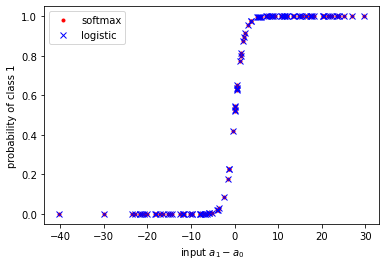

In [13]:
a = np.random.randn(100, 2)*10 #let's create 100 random choices for the 2D vector a

plt.plot(a[:,1] - a[:,0], softmax(a)[:,1], 'r.', label = 'softmax')
plt.plot(a[:,1] - a[:,0], logistic(a[:,1] - a[:,0]), 'bx', label = 'logistic')
plt.legend()
plt.xlabel(r'input $a_1 - a_0$')
plt.ylabel(r'probability of class 1')
plt.show()

### 2.b solution)
$$
S(a)[1] =  \frac{\exp(a_{1})}{\sum{\exp(a_{i})}} = \frac{\exp(a_{1})}{\exp(a_{0}) + \exp(a_{1})}\\
\sigma(z) = \frac{1}{1 + \exp(-z)}\\
\sigma(a_{1} - a_{0}) = \frac{1}{1 + \exp(a_{0} + a_{1})} = \frac{1}{1 + \frac{\exp(a_{0})}{ exp(a_{1})}} = \frac{\exp(a_{1})}{\exp(a_{0}) + \exp(a_{1})}\\
S(a)[1] = \sigma(a_{1} - a_{0})
$$

## Problem 3) Vectorizing Operations in Numpy (2pts)
This problem is to further familiarize you with vectorizing operations as an alternative to loops. You would need this use this skill for the next problem. 
Suppose we have $N$, D-dimensional vectors, and we would like to calculate their pairwise distance with another $M$ datapoints in D dimensions.
A first implementation will loop over all $N \times M$ choices of vectors and calculates their Euclidean distance. 
The second approach performs this calculation without a loop. You need to familiarize youself with how this is done. The code below compares the run-time of these two approaches. 
Explain the resulting plot. What does it tell you about the asymptotic performance when using loop vs vectorization?

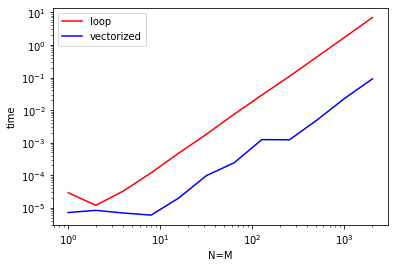

In [4]:
from time import time
times_loop, times_vector = [], []
D = 3

def distance_loop(
    X, # N x D
    Y, #M x D
):
    N, M = X.shape[0], Y.shape[0]
    dist_mat = np.zeros((N,M))
    for n in range(N):
        for m in range(M):
            dist_mat[n,m] = ((X[n,:] - Y[m,:])**2).sum()
    return np.sqrt(dist_mat)

def distance_vector(X,Y):
    dist_mat = np.sqrt(((X[:,None,:] - Y[None,:,:])**2).sum(-1))
    return dist_mat

Nlist = [2**i for i in range(12)]
for N in Nlist:
    X, Y = np.random.randn(N, D), np.random.randn(N, D)
    tst = time()
    distance_loop(X,Y)
    tnd = time() 
    times_loop.append(tnd - tst)

    tst = time()
    distance_vector(X,Y)
    tnd = time() 
    times_vector.append(tnd - tst)

plt.plot(Nlist, times_loop, 'r-', label="loop")
plt.plot(Nlist, times_vector, 'b-', label="vectorized")
plt.xscale('log') #logarithmic x-axis scale
plt.yscale('log')
plt.xlabel("N=M")
plt.ylabel("time")
plt.legend()
plt.show()


### 3. Solution
This figure shows the performance of the program after loop and loop vectorization. It can be seen that the optimization brought by vectorization becomes more obvious as the data magnitude becomes larger and larger

## Problem 4. Naive Bayes for Document Classification (10 pts)
In this programming assignment we want to use Naive Bayes with Bernoulli likelihood to classify text documents.
The dataset we will work with is the [20newsgroup](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) dataset. The task is to classify a given document under one of different news categories. We use four science categories `'sci.crypt','sci.electronics','sci.med', 'sci.space'` for this assignment.

The first step is preprocessing the data to get a **bag of words** representation of documents. For this we will follow the [`scikit-learn` tutoraial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html). In this representation, we have a large sparse matrix, where each row is a document and each column is a word in the vocabulary. The vocabulary consists of all the words that appear in our documents. Since we want to use Bernoulli likelihood, we want each element of this matrix to be either zero or one, indicating the presence of a particular word in each document. 

Note that a better alternative (not used in this assignment) is to count the number of times a word appears in a document, and adjust these word counts based on the length of documents and frequencies of each word across documents (see explanation of *Term Frequency times Inverse Document Frequency*, TF-IDF in the `scikit-learn` tutorial).

The first time you run the code below it will take some time to load the dataset.

In [101]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.crypt','sci.electronics', 'sci.space', 'sci.med']
data_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=123) #this dataset is in the form a dictionary
print(data_train.keys())
print(data_train['data']) # data is a "list" of text documents

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
['From: billq@ms.uky.edu (Billy Quinn)\nSubject: Re: Radio Shack Battery of the Month Club\nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 18\n\ndonrm@sr.hp.com (Don Montgomery) writes:\n\n\n>Radio Shack has canceled their "Battery of the Month" Club.  Does \n>anyone know why?  \n\n>They say they\'ll honor existing cards in customer hands, but no new\n>cards will be issued.\n\nI was told that this is an environmental based move.  I was also told that\nthere will be \'somthing\' else to replace the battery club.  Like maybe\nthe 360K floppy club ;-).\n\nWe\'ll see ....\n-- \n*-----------------------------------------------------------------------*\n*\tBill Quinn\t\t\tbillq@ms.uky.edu\t\t*\n*-----------------------------------------------------------------------*\n', 'From: et@teal.csn.org (Eric H. Taylor)\nSubject: Re: Gravity waves, was: Predicting gravity wave quantization & Cosmic Noise\nSummary

Next, we need to *tokenize* documents, by assigning an integer ID to the words. Tokenizer uses white space and punctuation to identify different words. This is followed by counting the frequency of tokens per document. `CountVectorizer` function below performs both of these steps, and produces a [`sparse` matrix](https://docs.scipy.org/doc/scipy/reference/sparse.html). There are different ways to represent matrices that have few non-zero values; for example we can store the index and the value of non-zeros, or alternatively the index-value of non-zero columns in each row. Each format is more suitable for certain operations. In the following we convert this sparse matrix to a dense matrix to simplify our implementation. However, note that for large documents and vocabularies we need to work with the sparse matrix. In the code below the design matrix `X_train` is the bag-of-word for the training data, and `Y_train` is the corresponding vector of labels. 

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data_train.data)
print(f'design matrix has {counts.shape[0]} rows (documents) and {counts.shape[1]} columns (words)')
counts.data[:] = 1 #we only care about the presence/absence rather than the actual count
X_train = np.array(counts.todense()) # turns the sparse matrix to a dense Numpy matrix. We then turn this matrix into an array format, which is more flexible for indexing purposes
Y_train = data_train.target

design matrix has 2373 rows (documents) and 38683 columns (words)


### 4a (6ts)
Now we are ready to write a Bernoulli Naive Bayes class for multi-class classification. 
The form closely follows our implementation for the [Gaussian Naive Bayes in the practice code](https://github.com/mravanba/comp451/blob/main/NaiveBayes.ipynb). Our class has a `fit` method that receives the input training data and sets model parameters. Then we have the `predict` method that uses the learned model parameter to produce class probabilities for a given input. For your implementation try to avoid loops and instead use vectorized operations. Loop over classes are okay since we have only a few classes but ideally we want to have a code without any loops. You can use the `onehot` method provided for one-hot encoding of a vector, and also make sure your implementation for estimation of `mu` is using **add-one smoothing**. Your code should basically estmate the prior `self.pi` and the class conditional likelihood for each word (features) `self.mu`.

In [1]:
from sklearn.preprocessing import OneHotEncoder #in case you need to use one-hot encoding of the labels
from scipy.special import logsumexp

def onehot(x, C=None): 
    # input x: N 
    # output: N x C
    #  assume each element of x takes values in {0,...,C-1}
    if C is None:
        C = np.max(x) + 1
    N = x.shape[0]
    x_hot = np.zeros((N,C))
    x_hot[np.arange(N), x] = 1 #use the value of x to index the last dimension
    return x_hot 

class BernoulliNaiveBayes:
    
    def __init__(self):
        self.pi = None #vector of length C for prior class probabilities
        self.mu = None # a CxD, where D is the number of binary features (Bernoulli likelihoods) 
        return
    
    def fit(
        self, 
        x, #N x D matrix 
        y, #vector of length N
        C=None #number of classes: if not provided will be infered from the numbers in y
    ):
        # YOUR CODE HERE >>>>>>>>>>>>
        N, D = x.shape
        if C is None:
            C = np.max(y) + 1
        mu = np.zeros((C,D))
        Nc = np.zeros(C)
        for c in range(C):
            x_c = x[y == c]                           
            Nc[c] = x_c.shape[0] 
            numerator = (x_c.sum(axis = 0)) + 1
            denominator = (x_c.shape[0]) + 2
            mu[c,:] = numerator / denominator                         
            
        self.mu = mu                                  # C x D               
        self.pi = (Nc+1)/(N+C)                        # add-one smoothing
        # YOUR CODE HERE <<<<<<<<<<<<
        return self # returning self, so that we can do calls like nb.fit(x,y).predict(x_test)
    
    def predict(
        self, 
        x # N x D matrix
        ):
        loglikelihood = (x[:,:,None] * np.log(self.mu).T[None,:,:] + (1. - x[:,:,None]) * np.log(1 - self.mu).T[None,:,:]).sum(1) # np.sum(NxDxC,1) => NxC
        logprior = np.log(self.pi) #C 
        logposterior = loglikelihood + logprior[None,:] # N x C
        logposterior = logposterior - logsumexp(logposterior, 1)[:,None]
        posterior = np.exp(logposterior)
        return posterior #N x C


ModuleNotFoundError: No module named 'sklearn'

Let's now check the training and test accuracy of the model

In [131]:
nb = BernoulliNaiveBayes()
nb.fit(X_train, Y_train) #fit the data
prob = nb.predict(X_train) #predict the probabilities for the training data
Y_pred = np.argmax(prob, 1) # choose the class with highest probability
accuracy = np.mean(Y_pred == Y_train) #see how many times the prediction matches the ground truth
print(f'Training accuracy {accuracy*100}\%')

Training accuracy 90.0969237252423\%


### 4b (4pts)
Now let's evaluate the test accuracy. Notice that even if test documents contain new words we don't want them to be used as features. Therefore we use the `vectorizer ` that we previously learned on the training data to create binary features for test documents.

In [2]:
data_test = fetch_20newsgroups(subset='test', categories=categories, random_state=123, shuffle=True)
# YOUR CODE HERE >>>>>>>>>>>>>>
counts = vectorizer.transform(data_test.data)
counts.data[:] = 1 #we only care about the presence/absence rather than the actual count
X_test = np.array(counts.todense()) # turns the sparse matrix to a dense Numpy matrix. We then turn this matrix into an array format, which is more flexible for indexing purposes
Y_test = data_test.target
prob = nb.predict(X_test) #predict the probabilities for the training data
Y_pred = np.argmax(prob, 1) # choose the class with highest probability
accuracy_test = np.mean(Y_pred == Y_test) #see how many times the prediction matches the ground truth
# YOUR CODE HERE <<<<<<<<<<<<<<<
print(f'Test accuracy {accuracy_test*100}\%')

NameError: name 'fetch_20newsgroups' is not defined